## Visualizations
(provided by Paul Moore - moorep@maths.ox.ac.uk)

Starting time of flac file is 2016-01-04 09:00:00 and 508684 microseconds
338.41953888978594


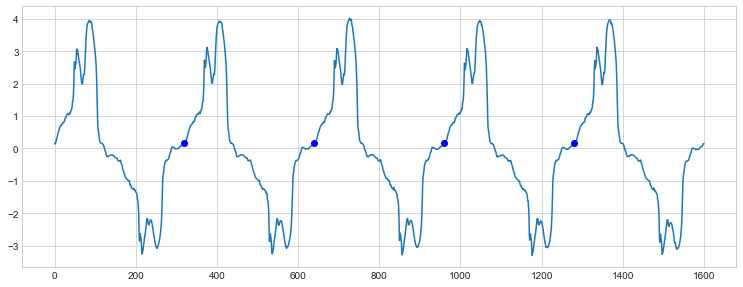

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import read_flac_file as rff
from IPython.display import clear_output
from time import sleep
import time
import datetime as dt
from datetime import timedelta


# this worksheet plots plots current or voltage from a 16kHz flac file.

# location of the high frequency (audio) data
dir_flacs = 'D:/flep/ukdale/'
# dir_flacs = '/scratch/dale_data/UK-DALE-2017/UK-DALE-2017-16kHz/house_1/2016/wk01'

# flac file to view - each flac file records one hour of data
# fn_flac = 'vi-1451865600_761652.flac'
fn_flac = 'vi-1451898000_508684.flac'

# extract the time stamp from the file name and print
time_stamp = float(fn_flac[3:13])+float(fn_flac[14:20])/1e6
time_frame = datetime.utcfromtimestamp(time_stamp).strftime('%Y-%m-%d %H:%M:%S and %f microseconds')
print("Starting time of flac file is " + time_frame)

# set the signal start and length in seconds
signal_start = 251
signal_length =0.1
    
# read the voltage and current from the flac file
(voltage,current) = rff.read_flac_segment(dir_flacs + "/" + fn_flac, signal_start, signal_length)

# choose which signal to view
signal = current
print(max(voltage))

# find zero up-crossing indexes using a snippet adapted from SO suggestion
zci = np.where(np.diff(np.sign(voltage))>0)[0]

# plot the chosen signal and the zero up-crossings
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = [12.8, 4.8])
ax = plt.axes()
sample_size = len(signal)
x = np.linspace(0, sample_size, sample_size)
ax.plot(x,signal)
ax.plot(zci,signal[zci],'bo')
   


In [2]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import read_flac_file as rff

"""
Version that prints signals from 2 different points in time. Translated so the 0-voltage points overlap.
"""

# location of the high frequency (audio) data
dir_flacs = 'D:/flep/ukdale/'
# dir_flacs = '/scratch/dale_data/UK-DALE-2017/UK-DALE-2017-16kHz/house_1/2016/wk01'

# flac file to view - each flac file records one hour of data
fn_flac = 'vi-1451865600_761652.flac'
# fn_flac = 'vi-1451869200_223156.flac'

# extract the time stamp from the file name and print
time_stamp = float(fn_flac[3:13])+float(fn_flac[14:20])/1e6
time_frame = datetime.utcfromtimestamp(time_stamp).strftime('%Y-%m-%d %H:%M:%S and %f microseconds')
print("Starting time of flac file is " + time_frame)



# set the signal start and length in seconds
signal_start = 58*60
signal_start2 = 5*60 #at 30*60 something happens
signal_length =0.1

# read the voltage and current from the flac file
(voltage,current) = rff.read_flac_segment(dir_flacs + "/" + fn_flac, signal_start, signal_length)
(voltage2,current2) = rff.read_flac_segment(dir_flacs + "/" + fn_flac, signal_start2, signal_length)

# choose which signals to view
signal = current
signal2 = current2

# find zero up-crossing indexes using a snippet adapted from SO suggestion
zci = np.where(np.diff(np.sign(voltage))>0)[0]
zci2 = np.where(np.diff(np.sign(voltage2))>0)[0]

# plot the chosen signal and the zero up-crossings
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = [12.8, 4.8])
ax = plt.axes()
sample_size = len(signal)
x = np.linspace(0, sample_size, sample_size)

ax.plot(x,signal,'b')
ax.plot(x-zci2[0]+zci[0],signal2,'r')
ax.plot(zci,signal[zci],'bo')

Starting time of flac file is 2016-01-04 00:00:00 and 761652 microseconds


RuntimeError: Error opening 'D:/flep/ukdale//vi-1451865600_761652.flac': System error.

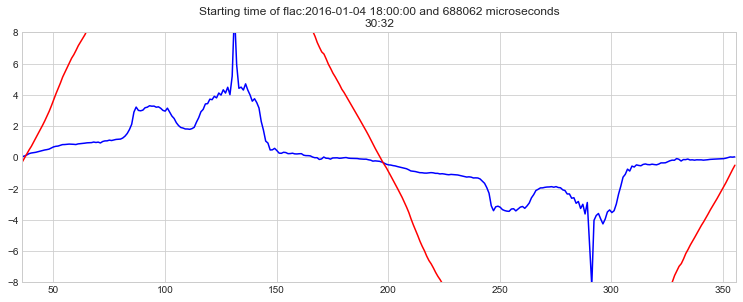

In [11]:
def plot2signals(dir_flacs, fn_flac, time1=58*60, time2=5*60, normalized=False, yscale=8, wattage_data=''):
    time_stamp = float(fn_flac[3:13])+float(fn_flac[14:20])/1e6
    time_frame = datetime.utcfromtimestamp(time_stamp).strftime('%Y-%m-%d %H:%M:%S and %f microseconds')
    
    # set the signal start and length in seconds
    signal_start = time1
    signal_start2 = time2 
    signal_length =0.1

    # read the voltage and current from the flac file
    (voltage,current) = rff.read_flac_segment(dir_flacs + "/" + fn_flac, signal_start, signal_length)
    (voltage2,current2) = rff.read_flac_segment(dir_flacs + "/" + fn_flac, signal_start2, signal_length)

    # choose which signals to view
    signal = current
    signal2 = current2
    

    # find zero up-crossing indexes using a snippet adapted from SO suggestion
    zci = np.where(np.diff(np.sign(voltage))>0)[0]
    zci2 = np.where(np.diff(np.sign(voltage2))>0)[0]
    cycle_size = zci[1] - zci[0]
    
    # exit if the length of the second cycle is too different from the length of the initial cycle
    if abs(cycle_size-zci2[1]+zci2[0]) > 10 :
        return -1
    
    
    # plot the chosen two signals
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize = [12.8, 4.6])
    
    plt.ylim(-yscale, yscale)
    plt.xlim(zci[0], zci[1])
    strtext = "Starting time of flac:{}\n{}:{}".format(time_frame, time2//60, time2%60) + wattage_data
    plt.title(strtext)
    sample_size = len(signal)
    x = np.linspace(0, sample_size, sample_size)
    
    # using this so the zci points overlap for the two signals
    x_translate = x - zci2[0] + zci[0]
    
    # truncate the signals
    s1 = signal[zci[0]:zci[1]]
    s2 = signal2[zci2[0]:zci2[0]+cycle_size]
    if normalized:
        s1 = 2.2*s1/np.max(s1)
        s2 = 2.2*s2/np.max(s2)
        
    plt.plot(x[zci[0]:zci[1]],s1,'b')
    plt.plot(x_translate[zci2[0]:zci2[0]+cycle_size],s2,'r')
    
def read_appliance(fnstem_slow_data, channel, hour):
    fn_dat = fnstem_slow_data + str(channel) + ".dat"

    # set time interval - the dat file covers a long period
    ts_day = time.mktime(dt.date(2016,1,4).timetuple())
    ts_hour = ts_day + hour*3600
    ts_next_hour = ts_hour + 3600 

    # read appliance (also called disaggregated) data
    df = pd.read_csv(fn_dat,' ') 
    df.columns = ['ts','watts']
    df = df.loc[(df['ts']>=ts_hour) & (df['ts']<ts_next_hour),:]    
    return df
    
plot2signals(dir_flacs, fn_flac, 34, 30*60+32, yscale=8)


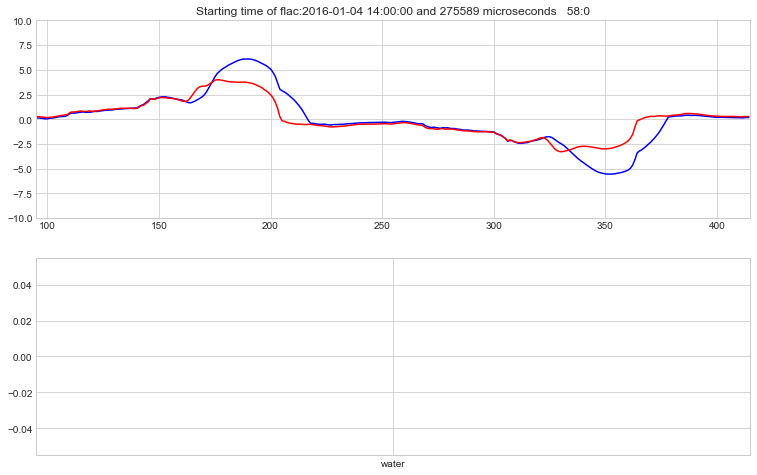

In [4]:

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

fn_flac = 'vi-1451916000_275589.flac'
start = 0
for i in range(start,start+3500,30):
    plt.figure(figsize = [12.8, 8])
    plt.subplot(211)
    plot2signals(dir_flacs, fn_flac, start, i, yscale=10)
    plt.subplot(212)
    plt.bar(['water'],0)
    plt.show()
    sleep(0.01)
    clear_output(wait=True)

In [20]:
# location of low freqency data
fnstem_slow_data = "D:/flep/ukdale/house_1/channel_"
# location of high frequency data
fn_flac = 'vi-1451930400_688062.flac'

channel = 2
hour = 18 #make sure this corresponds to the flac file
print('Reading channel %d data'%channel)
df = read_appliance(channel, hour) #reads dataframe

for idx in df.index:
    ts = df['ts'][idx]
    watt = df['watts'][idx]
    date = dt.datetime.fromtimestamp(ts)
    
    err = plot2signals(dir_flacs, fn_flac, time1=0, time2=date.second + 60*date.minute, yscale=15, 
                 wattage_data="\n\nCHANNEL {}: {} WATTS\n".format(channel,watt))
    
    plt.show()
    
    sleep(0.01)
    clear_output(wait=True)


IndexError: index 1 is out of bounds for axis 0 with size 0